In [4]:
library(plotly)
library(ggplot2)
library(tidyverse)
library(reshape)#melt
library(ggrepel)
library(htmlwidgets)
library(gsubfn)

In [5]:
fix_label = function(rels){
    rels = gsub(' and ','-',rels)
    rels = gsub(' - ','-',rels)
    rels = gsub('-',' - ',rels)
    rels <- tolower(rels) # 将所有单词变为小写
    rels <- gsub("(^|\\s)([a-z])", "\\1\\U\\2", rels, perl = TRUE) # 首字母大写
    rels = gsub(', ',' - ',rels)
    return(rels)
}

fix_phrase <- function(phrase) {
  words <- unlist(strsplit(phrase, ' '))
  words <- tolower(words)
  words[1] <- gsub("(^|\\s)([a-z])", "\\1\\U\\2", words[1], perl = TRUE)# 首字母大写
  return(paste(words, collapse = ' '))
}

In [6]:
scores_var=read.csv('./output_data/usa_GTall_scores_var.csv',row.names=1)

scores_var_plot = data.frame(scores_var)
colnames(scores_var_plot) = c('Formality','Valence','Equality','Exchange','Activeness')
scores_var_plot['Formality'] = -scores_var_plot['Formality']
scores_var_plot['Exchange'] = -scores_var_plot['Exchange']
scores_var_plot['Activeness'] = -scores_var_plot['Activeness']
scores_var_plot['Valence'] = -scores_var_plot['Valence']
scores_var_plot['Equality'] = -scores_var_plot['Equality']

scores_var_plot['rel'] = rownames(scores_var_plot)

In [7]:
rel_fix = fix_label(scores_var_plot$rel)

rel_fix = gsub('Non - Locals','Non-locals',rel_fix)
rel_fix = gsub('Non - Disableds','Non-disableds',rel_fix)
rel_fix = gsub('Mother - In - Law','Mother-in-law',rel_fix)
rel_fix = gsub('Daughter - In - Law','Daughter-in-law',rel_fix)

text <- c(
    'Trio Of Friends',
    'The Three Individuals In A Love Triangle',
    'Tour Guide',
    'Real Estate Agent',
    'Patient\'s Family',
    'Mental Patient',
    'Union Representative',
    'Drug Manufacturer',
    'Drug Dealer',
    'Debt Collector',
    'Prime Minister',
    'Police Officer',
    'Home Tutor',
    'Ethnic Minorities',
    'Ethnic Majority',
    'Paternal Relatives',
    'Maternal Relatives',
    'Job Applicants',
    'Rural Residents',
    'Urban Residents',
    'Rival Gang Member',
    'Gang Member'
)

for (x in text) {
    fixed_phrases <- fix_phrase(x)
    rel_fix = gsub(x,fixed_phrases,rel_fix)
}

rel_fix = gsub('Daughter - In - Law','Daughter-in-law',rel_fix)

scores_var_plot['rel'] = rel_fix

In [11]:
scores_var_plot['Equality'] %>% arrange(Equality) %>% head(10)
scores_var_plot['Equality'] %>% arrange(Equality) %>% tail(10)

,Equality
,<dbl>
Trio of friends,-2.3495694
"Prosecutor, Judge, Lawyer",-2.1325974
Volunteers-Community Residents,-2.1315142
"King, Prime Minister, Citizen",-1.7211968
Elderly - young,-1.6801776
Rural residents - Urban residents,-1.6103526
Grandparents - Grandchildren,-1.5379008
"Volunteer, Organizer, Beneficiary",-1.3415475
"supplier, retailer, consumer",-1.2743853


,Equality
,<dbl>
"Prostitute, Pmip, Customer",1.031920
"Father, mother, child",1.092554
Employers - Employees,1.282561
"Prisoner, Cellmate, Guard",1.301342
Police officers - Civilians,1.389958
Bosses - Secretaries,1.467398
Parents - Children,1.550601
"Plaintiff, defendant, mediator",2.103836
"Lawyer, litigant, judge",2.213167


In [13]:
#print(scores_var_plot['rel'])

# Formality-Activeness

In [14]:
show_rel_FA = c('Rich - Poor','Blacks - Whites',
            'Athlete - Coach - Referee','Elderly - Young',
            'The three individuals in a love triangle','Father - Mother - Child',
            'Males - Females','Dealers - Buyers'
               )

show_rel_FA_df = scores_var_plot %>% filter(rel %in% show_rel_FA)

In [15]:
group_plot = scores_var_plot[1:40,]
triadic_plot = scores_var_plot[41:74,]

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."


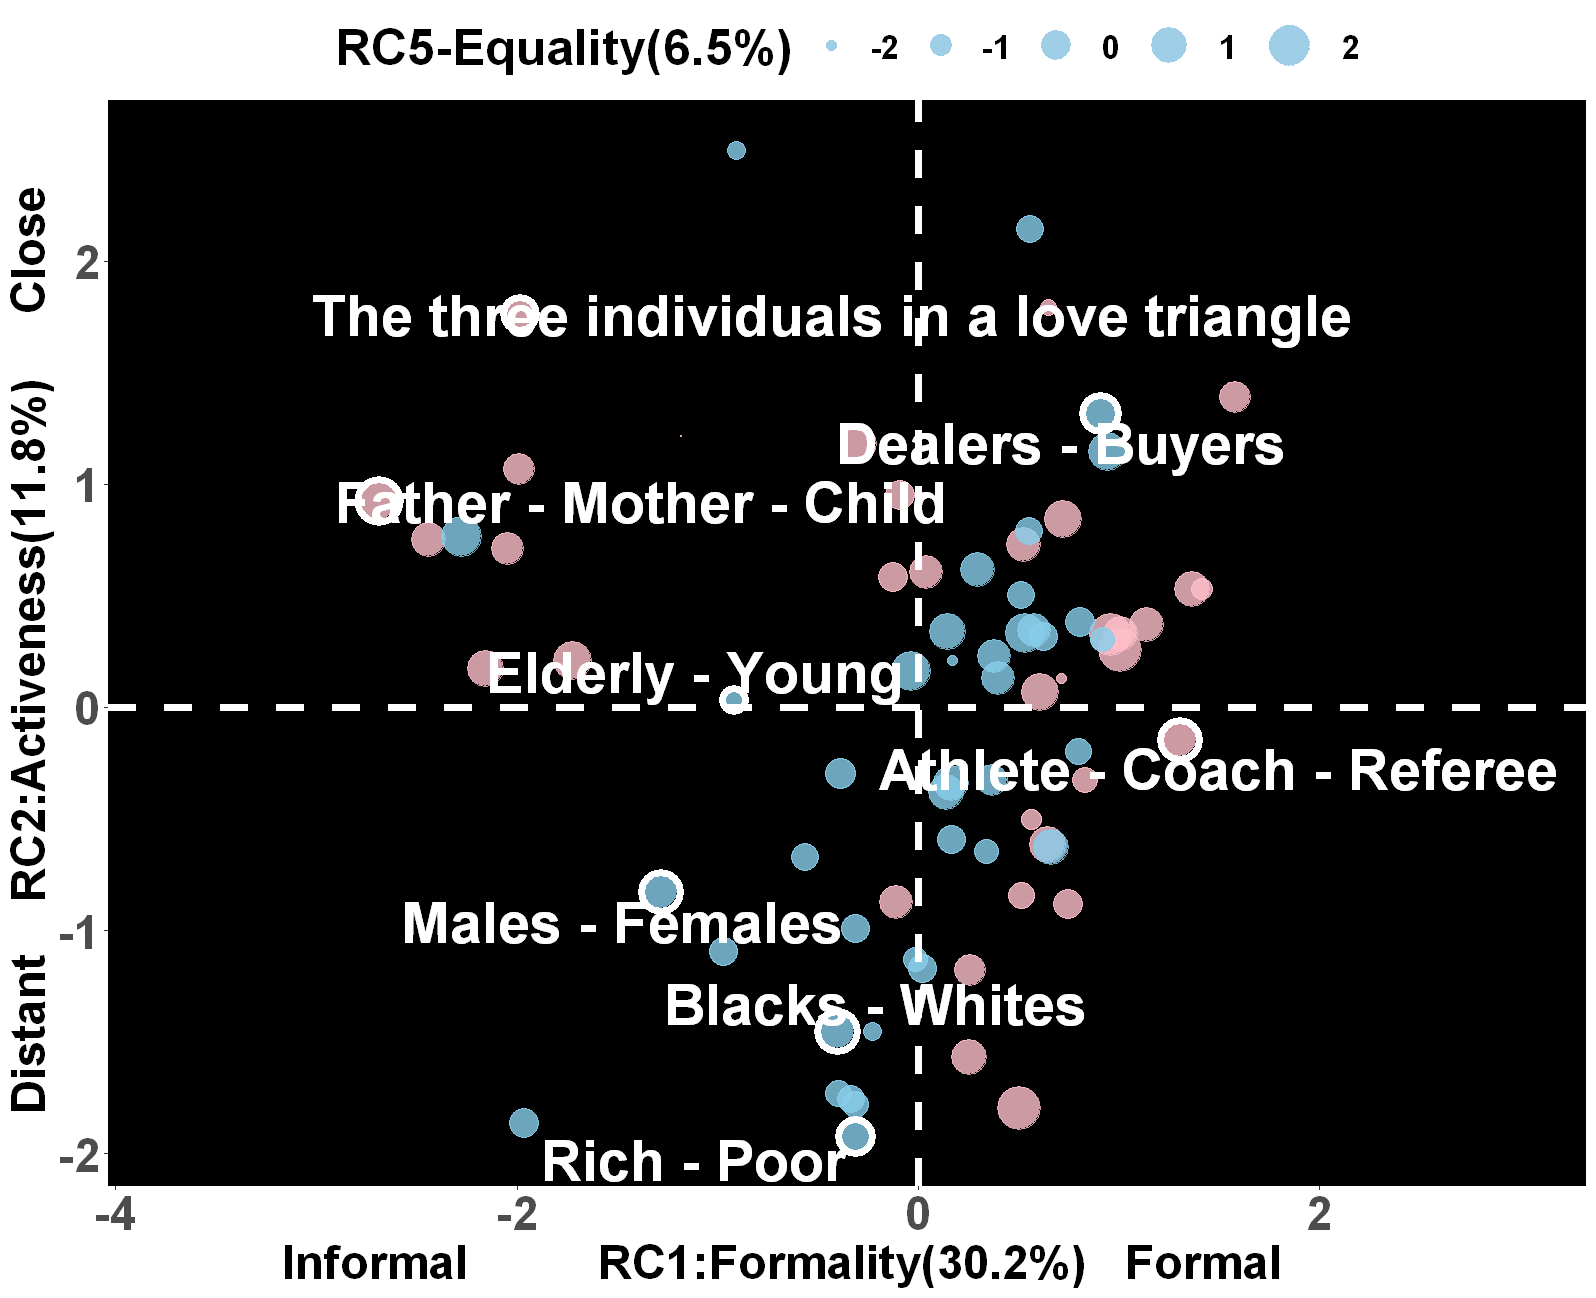

In [16]:
randomseed = 2022
options(repr.plot.height=10.82,repr.plot.width=13.3)
ggplot()+
geom_point(data=triadic_plot,
           aes(x=Formality,y=Activeness,size=Equality),color='pink',alpha=0.8)+
geom_point(data=group_plot,
           aes(x=Formality,y=Activeness,size=Equality),color='skyblue',alpha=0.8)+
#scale_color_gradient(low = 'white',high = '#DAFD59')+
#guides(alpha=guide_legend(title = 'alpha:RC5:Equality(7.4%)'))+

geom_text_repel(data = show_rel_FA_df,
                mapping=aes(label=rel,x=Formality,y=Activeness),size=12,
                seed = randomseed,
                fontface = 'bold',color='white',
                #family='',
                min.segment.length = Inf)+
geom_point(data = show_rel_FA_df,
           aes(x=Formality,y=Activeness,size=Equality),color='white',
           shape=1,stroke=3)+
scale_size_continuous(range=c(0.1,12))+
#geom_rug(aes(color=Equality),color='#DAFD59')+

xlim(-3.7,3)+
xlab('     Informal          RC1:Formality(30.2%)   Formal               ')+   # CHANGED
ylab('   Distant    RC2:Activeness(11.8%)     Close    ')+  # CHANGED

geom_hline(yintercept = 0,linetype='dashed',size = 2,color='white')+
geom_vline(xintercept = 0,linetype='dashed',size = 2,color='white')+
#ggtitle('USA_Study3')+
theme_bw()+
theme(panel.border=element_blank(),panel.grid=element_blank(),
      panel.background = element_rect(fill = 'black'), 
      axis.title.x=element_text(size=28,face='bold'),
      axis.title.y=element_text(size=28,face='bold'),
      axis.text=element_text(size=28,face='bold'),
      legend.title=element_text(face="bold",size=30),
      legend.position='top',#legend.key.height=unit(1,'cm')
      legend.text=element_text(face="bold",size=20))+
labs(size = 'RC5-Equality(6.5%)')  # CHANGED

# Valence-Exchange

In [17]:
show_rel_VE = c('The three individuals in a love triangle','Republicans - Democrats',
            'Trio of friends','Middleman - Seller - Buyer',
            'Guest - Host - Audience','Teacher - Student - Parent',
            'Doctor - Nurse - Patient'
               )

show_rel_VE_df = scores_var_plot %>% filter(rel %in% show_rel_VE)

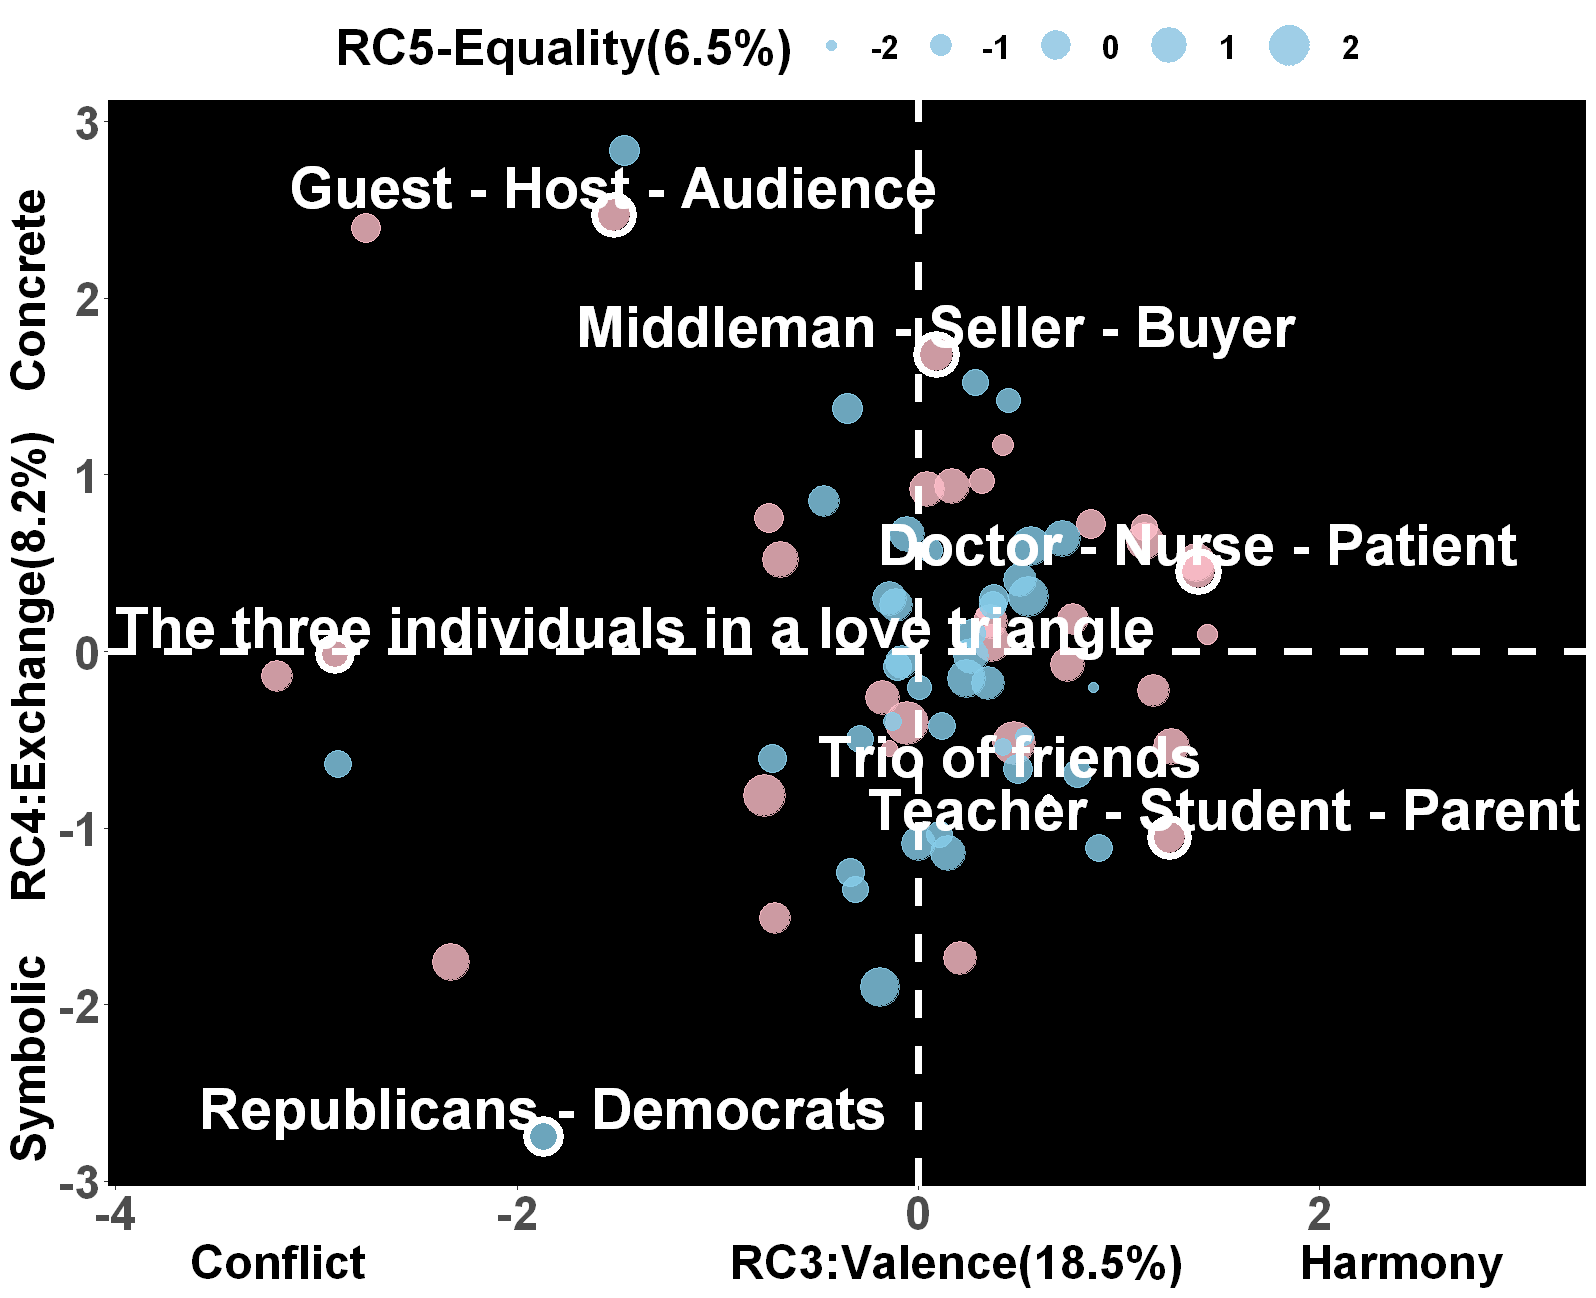

In [18]:
randomseed = 2022
options(repr.plot.height=10.82,repr.plot.width=13.3)
ggplot()+
geom_point(data=triadic_plot,
           aes(x=Valence,y=Exchange,size=Equality),color='pink',alpha=0.8)+
geom_point(data=group_plot,
           aes(x=Valence,y=Exchange,size=Equality),color='skyblue',alpha=0.8)+
#scale_color_gradient(low = 'white',high = '#DAFD59')+
#guides(alpha=guide_legend(title = 'alpha:RC5:Equality(7.4%)'))+

geom_text_repel(data = show_rel_VE_df,
                mapping=aes(label=rel, x=Valence,y=Exchange),size=12,
                seed = randomseed,
                fontface = 'bold',color='white',nudge_y=0.15,
                #family='',
                min.segment.length = Inf)+
geom_point(data = show_rel_VE_df,
           aes(x=Valence,y=Exchange,size=Equality),color='white',
           shape=1,stroke=3)+
#geom_rug(aes(color=Equality),size=2)+
scale_size_continuous(range=c(0.1,12))+

xlim(-3.7,3)+
xlab('Conflict                            RC3:Valence(18.5%)         Harmony')+# CHANGED
ylab('     Symbolic    RC4:Exchange(8.2%)   Concrete          ')+ # CHANGED
# xlab('Conflict     RC3:Valence(18.5%)       Harmony')+   # CHANGED
# ylab('     Symbolic    RC4:Exchange(8.2%)   Concrete          ')+   # CHANGED

geom_hline(yintercept = 0,linetype='dashed',size = 2,color='white')+
geom_vline(xintercept = 0,linetype='dashed',size = 2,color='white')+

theme_bw()+
theme(panel.border=element_blank(),panel.grid=element_blank(),
      panel.background = element_rect(fill = 'black'),
      axis.title.x=element_text(size=28,face='bold'),
      axis.title.y=element_text(size=28,face='bold'),
      axis.text=element_text(size=28,face='bold'),
      legend.title=element_text(face="bold",size=30),
      legend.position='top',
      legend.text=element_text(face="bold",size=20))+
labs(size = 'RC5-Equality(6.5%)',color='')   # CHANGED